<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/Bai_7_bbc_fulltext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Phân cụm dữ liệu dựa trên cột content trong dữ liệu được cung cấp.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong folder BBC, trong BBC có 5 folder con, ứng với từng folder con, đọc content của từng file và cho vào columns content của dataframe

**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
bbc_path = path + 'data/bbc'
classes = {}
list_content = []
import os
with os.scandir(bbc_path) as entries:
    for entry in entries:
        with os.scandir(bbc_path+'/'+entry.name) as files:
          for f_name in files:
            f = open(bbc_path+'/'+entry.name+'/'+f_name.name, "r", encoding='unicode_escape')
            file_content = f.read()
            f.close()
            list_content.append(file_content)
        classes[entry.name] = list_content


In [ ]:
len(classes)

5

In [ ]:
data = pd.DataFrame()
for key, values in classes.items():
  data['class'] = key
  data['content'] = values
data.head()

,class,content
0,tech,Ad sales boost Time Warner profit\n\nQuarterly...
1,tech,Dollar gains on Greenspan speech\n\nThe dollar...
2,tech,Yukos unit buyer faces loan claim\n\nThe owner...
3,tech,High fuel prices hit BA's profits\n\nBritish A...
4,tech,Pernod takeover talk lifts Domecq\n\nShares in...


In [ ]:
data.shape

(2225, 2)

**Sử dụng thuật toán KMeans để phân cụm**

In [ ]:
X_train = data['content']
X_train.head()

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: content, dtype: object

**Chuyển text sang dữ liệu dạng số**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count = CountVectorizer()
count.fit(X_train)
bag_of_words = count.transform(X_train)
bag_of_words

<2225x29421 sparse matrix of type '<class 'numpy.int64'>'
	with 449254 stored elements in Compressed Sparse Row format>

In [ ]:
X = bag_of_words.toarray()
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
#chọn k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[ 9.97008973e-04  2.93120638e-01  3.08997619e-18 ...  9.97008973e-04
   2.99102692e-03  1.99401795e-03]
 [ 8.04289544e-03  4.95978552e-01  2.68096515e-03 ...  2.71050543e-18
   2.68096515e-03  5.42101086e-18]
 [ 1.42857143e-01  1.14285714e+00 -5.42101086e-20 ... -5.42101086e-20
  -2.16840434e-19 -1.08420217e-19]
 [-2.16840434e-18  3.83720930e-01  5.96311195e-19 ...  5.96311195e-19
   2.38524478e-18  1.19262239e-18]
 [ 1.32275132e-03  3.75661376e-01  2.98155597e-18 ...  2.98155597e-18
   1.19262239e-17  5.96311195e-18]]
[4 4 0 ... 3 4 2]


In [ ]:
data["Group"] = pd.Series(labels)
data.head()

,class,content,Group
0,tech,Ad sales boost Time Warner profit\n\nQuarterly...,4
1,tech,Dollar gains on Greenspan speech\n\nThe dollar...,4
2,tech,Yukos unit buyer faces loan claim\n\nThe owner...,0
3,tech,High fuel prices hit BA's profits\n\nBritish A...,0
4,tech,Pernod takeover talk lifts Domecq\n\nShares in...,0


In [ ]:
data.Group.value_counts()

0    1003
4     756
1     373
3      86
2       7
Name: Group, dtype: int64

**Show word cloud từng group**

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

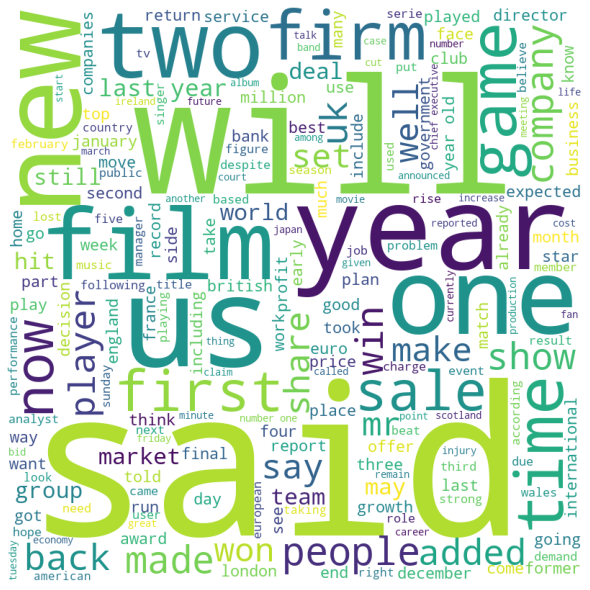

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in data[data['Group']==0].content: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

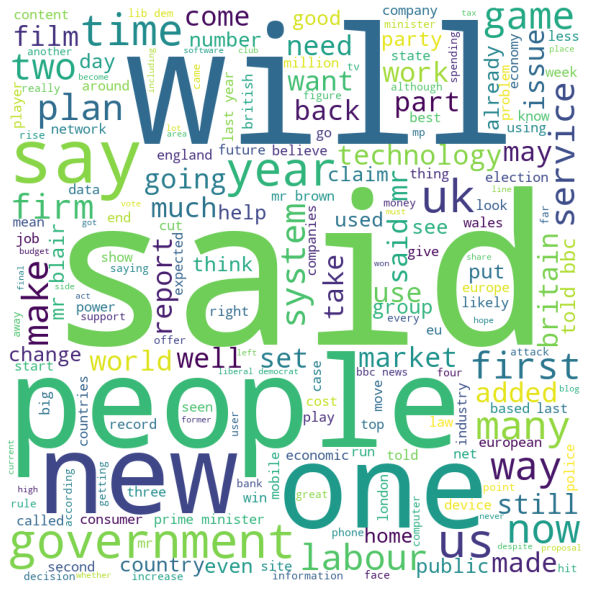

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in data[data['Group']==1].content: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

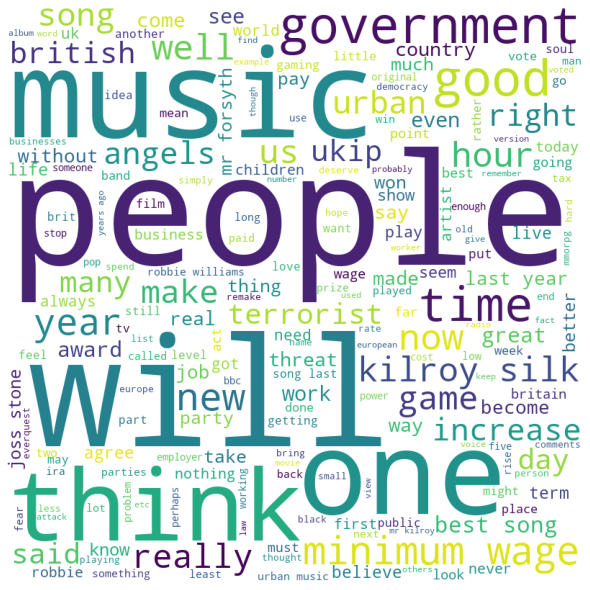

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in data[data['Group']==2].content: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

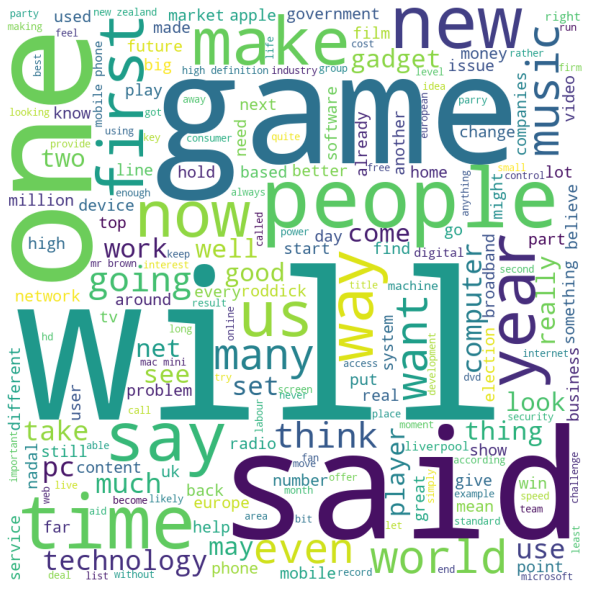

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in data[data['Group']==3].content: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

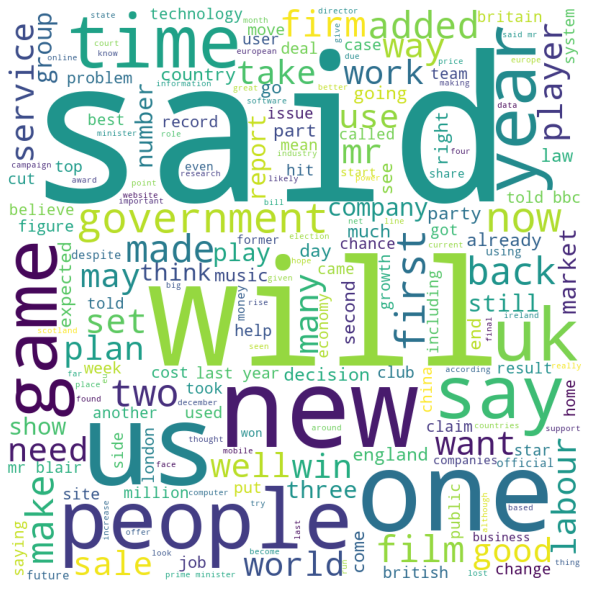

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in data[data['Group']==4].content: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Kết quả không đúng với class hiện có**